In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import sklearn
print(sklearn.__version__)

1.3.1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [4]:
#Read the CSV file and I specify the encoding and data types
PCOS_dt = pd.read_csv(r'C:\Users\User\Downloads\PCOS_data.csv', encoding='ISO-8859-1')

In [5]:
print(PCOS_dt)

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0        152.000  19.3           15                78                22  ...   

In [6]:
PCOS_dt.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


## Understanding the Dataset
##### Patient File No. : This is the report number which has data for a particular patient
##### PCOS : Polycystic ovary syndrome (PCOS) is a hormonal disorder common among women of reproductive age, we would like to determine whether the patient has this syndrome or not
##### Age (yrs) : Age of patient in years
##### Weight (Kg) : Weight of patient in kg
##### Height(Cm) : Height of patient in centimeter
##### BMI : Body mass index of the patient
##### Blood Group : Blood Group of the patient A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups)
##### Pulse rate(bpm) : It is the heart rate of patient in beats per minute. Resting heart rate for adults ranges from 60 to 100 beats per minute
##### RR (breaths/min) : It is the respiration rate. Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.
##### Hb(g/dl) : Hemoglobin levels in gram per deciliter. For women, a normal level ranges between 12.3 gm/dL and 15.3 gm/dL.
##### Cycle(R/I) :Cycle regular or irregular
##### Cycle length(days) : This represents length of menstrual cycle. The length of the menstrual cycle varies from woman to woman, but the average is to have periods every 28 days.
##### Marraige Status (Yrs) : Years of marriage
##### Pregnant(Y/N) : If the patient is pregnant
##### No. of aborptions : No. of aborptions, if any. There are total 541 values out of which 437 patients never had any abortions.
##### I beta-HCG(mIU/mL) : this is case 1 of beta hcg
##### II beta-HCG(mIU/mL) : this is case 2 of beta hcg (please note: An beta hCG level of less than 5 mIU/mL is considered negative for pregnancy, and anything above 25 mIU/mL is considered positive for pregnancy) (also the unit mIU/mL is mili International Units per miliLiter)
##### FSH(mIU/mL) : Its full form is Follicle-stimulating hormone. During puberty: it ranges from 0.3 to 10.0 mIU/mL (0.3 to 10.0 IU/L) Women who are still menstruating: 4.7 to 21.5 mIU/mL (4.5 to 21.5 IU/L) After menopause: 25.8 to 134.8 mIU/mL (25.8 to 134.8 IU/L)
##### LH(mIU/mL) : It is Luteinizing Hormone.
##### FSH/LH : Ratio of FSH and LH
##### Hip(inch) : Hip size in inches
##### Waist(inch) : Waist Size in inches
##### Waist:Hip Ratio : Waist by hip ratio
##### TSH (mIU/L) : It is thyroid stimulating hormone. Normal values are from 0.4 to 4.0 mIU/L
##### AMH(ng/mL) : It is Anti-Mullerian Hormone.
##### PRL(ng/mL) : This represents Prolactin levels.
##### Vit D3 (ng/mL): Vitamin D levels. Normal vitamin D levels in the blood are 20 ng/ml or above for adults.
##### PRG(ng/mL): Progesterone levels
##### RBS(mg/dl): This value is obtained by doing Random Blood Sugar (RBS) Test.
##### Weight gain(Y/N): Is there been a weight gain
##### hair growth(Y/N): Is there been a hair growth
##### Skin darkening (Y/N): Skin darkening issues
##### Hair loss(Y/N): hair loss issues
##### Pimples(Y/N): pimples issues
##### Fast food (Y/N): is fast food part of you diet
##### Reg.Exercise(Y/N): do you do exercises on a regular basis
##### BP _Systolic (mmHg): Systolic blood pressure, measures the pressure in your arteries when your heart beats.
##### BP _Diastolic (mmHg): Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.
##### Follicle No. (L): Follicles number in the left side
##### Follicle No. (R): Follicles number in the right side
##### Avg. F size (L) (mm): Average Follicle size in the left side in mm
##### Avg. F size (R) (mm): Average Follicle size in the right side in mm
##### Endometrium (mm): Size of Endometrium in mm

In [7]:
print(PCOS_dt.shape)

(541, 45)


In [8]:
# Check the data types of the variables
PCOS_dt.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [9]:
def categorize_BMI(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 25:
        return 'Normal'
    elif 25 <= BMI < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Categorize BMI and add a new column 'BMI_category'
PCOS_dt['BMI_category'] = PCOS_dt['BMI'].apply(categorize_BMI)
print(PCOS_dt)

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0        152.000  19.3           15                78                22  ...   

In [10]:
# Define the categorize_BMI function
def categorize_BMI(BMI):
    if BMI < 18.5:
        return 1  # underweight
    elif 18.5 <= BMI < 25:
        return 2  # normal_weight
    elif 25 <= BMI < 30:
        return 3  # overweight
    else:
        return 4  # obese

# Categorize BMI and add a new column 'BMI_category'
PCOS_dt['BMI_category'] = PCOS_dt['BMI'].apply(categorize_BMI)

# Print the updated DataFrame
print(PCOS_dt)

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0        152.000  19.3           15                78                22  ...   

In [11]:
# Example usage:
calculated_BMI = 23.5  # Replace with the calculated BMI
BMI_category = categorize_BMI(calculated_BMI)
print(f"The BMI category is: {BMI_category}")

The BMI category is: 2


In [12]:
# Define a function to determine exercise intensity based on BMI
def determine_exercise_intensity(BMI):
    if BMI < 18.5:  # Underweight
        return 'Light'
    elif 18.5 <= BMI < 25:  # Normal weight
        return 'Moderate'
    elif 25 <= BMI < 30:  # Overweight
        return 'Moderate'
    else:  # Obese
        return 'Intense'

# Apply the function to create the exercise_intensity column
PCOS_dt['exercise_intensity'] = PCOS_dt['BMI'].apply(determine_exercise_intensity)

# Display the updated DataFrame
print(PCOS_dt)

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0        152.000  19.3           15                78                22  ...   

In [13]:
# Define a function to convert exercise intensity categories from words to numbers based on BMI ranges
def convert_intensity_to_number(BMI):
    if BMI < 18.5:  # Underweight
        return 1  # Low Intensity
    elif 18.5 <= BMI < 25:  # Normal weight
        return 2  # Moderate Intensity
    elif 25 <= BMI < 30:  # Overweight
        return 2  # Moderate Intensity
    else:  # Obese
        return 3  # High Intensity

# Apply the function to create the exercise_intensity_num column
PCOS_dt['exercise_intensity'] = PCOS_dt['BMI'].apply(convert_intensity_to_number)

# Display the updated DataFrame
print(PCOS_dt)

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0        152.000  19.3           15                78                22  ...   

In [14]:
# Define a function to recommend lightweight exercises based on BMI figure
def recommend_lightweight_exercise(BMI):
    if BMI < 18.5:  # Underweight
        if BMI < 18.0:
            return "Yoga"
        elif BMI < 18.3:
            return "Pilates"
        else:
            return "Stretching"
    elif 18.5 <= BMI < 25:  # Normal weight
        if BMI < 20.0:
            return "Walking"
        elif BMI < 21.5:
            return "Cycling"
        else:
            return "Swimming"
    elif 25 <= BMI < 30:  # Overweight
        if BMI < 27.0:
            return "Water Aerobics"
        elif BMI < 28.5:
            return "Elliptical Training"
        else:
            return "Dancing"
    else:  # Obese
        if BMI < 35.0:
            return "Tai Chi"
        elif BMI < 38.0:
            return "Chair Yoga"
        else:
            return "Resistance Band Training"

# Apply the function to create the Lightweight_exercise column
PCOS_dt['Lightweight_exercise'] = PCOS_dt['BMI'].apply(recommend_lightweight_exercise)

# Print the updated DataFrame
print(PCOS_dt)

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0        152.000  19.3           15                78                22  ...   

In [15]:
# Define a function to recommend lightweight exercises based on BMI figure
def recommend_lightweight_exercise(BMI):
    if BMI < 18.5:  # Underweight
        if BMI < 18.0:
            return 1  # Yoga
        elif BMI < 18.3:
            return 2  # Pilates
        else:
            return 3  # Stretching
    elif 18.5 <= BMI < 25:  # Normal weight
        if BMI < 20.0:
            return 4  # Walking
        elif BMI < 21.5:
            return 5  # Cycling
        else:
            return 6  # Swimming
    elif 25 <= BMI < 30:  # Overweight
        if BMI < 27.0:
            return 7  # Water Aerobics
        elif BMI < 28.5:
            return 8  # Elliptical Training
        else:
            return 9  # Dancing
    else:  # Obese
        if BMI < 35.0:
            return 10  # Tai Chi
        elif BMI < 38.0:
            return 11  # Chair Yoga
        else:
            return 12  # Resistance Band Training

# Apply the function to create the Lightweight_exercise column
PCOS_dt['Lightweight_exercise'] = PCOS_dt['BMI'].apply(recommend_lightweight_exercise)

# Print the updated DataFrame
print(PCOS_dt)

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0        152.000  19.3           15                78                22  ...   

#### Quick EDA (Exploratory Data Analysis)

In [16]:
PCOS_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [17]:
PCOS_dt.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [18]:
PCOS_dt.dropna()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,BMI_category,exercise_intensity,Lightweight_exercise
180,181,181,1,30,70.0,150.0,31.1,16,74,18,...,80,8,6,12.0,11.0,4.5,.,4,3,10
363,364,364,0,31,48.0,152.0,20.8,17,72,18,...,80,1,3,13.0,13.0,7.0,7,2,2,5


In [19]:
PCOS_dt['II    beta-HCG(mIU/mL)'] = pd.to_numeric(PCOS_dt['II    beta-HCG(mIU/mL)'],errors='coerce')
PCOS_dt['AMH(ng/mL)'] = pd.to_numeric(PCOS_dt['AMH(ng/mL)'],errors='coerce')

In [20]:
PCOS_dt.drop('Unnamed: 44',axis=1,inplace=True)

In [21]:
PCOS_dt.keys()

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'BMI_category', 'exercise_intensity', 'Lightweight_exercise'],
      dtype='object')

In [22]:
PCOS_dt.corr()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),BMI_category,exercise_intensity,Lightweight_exercise
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.082840,0.001705,-0.044533,-0.015196,...,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219,-0.082896,-0.057279,-0.082271
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.082840,0.001705,-0.044533,-0.015196,...,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219,-0.082896,-0.057279,-0.082271
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.199697,0.036433,0.091821,0.036928,...,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648,0.161105,0.115562,0.169276
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021372,-0.010954,0.045831,0.087382,...,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238,0.001439,-0.034361,0.010078
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.901688,0.072682,0.019983,0.043614,...,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100,0.817022,0.694987,0.867562
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006845,0.040825,-0.074339,-0.029459,...,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035,-0.016108,0.025176,-0.008485
BMI,-0.082840,-0.082840,0.199697,0.021372,0.901688,-0.006845,1.000000,0.061328,0.050507,0.061579,...,0.069737,0.140062,0.143110,0.104425,-0.011736,-0.111427,0.009327,0.911258,0.755652,0.962721
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.061328,1.000000,0.047572,-0.023766,...,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335,0.027950,0.068747,0.060610
Pulse rate(bpm),-0.044533,-0.044533,0.091821,0.045831,0.019983,-0.074339,0.050507,0.047572,1.000000,0.303804,...,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241,0.021659,0.011934,0.022397
RR (breaths/min),-0.015196,-0.015196,0.036928,0.087382,0.043614,-0.029459,0.061579,-0.023766,0.303804,1.000000,...,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930,0.064165,0.066292,0.054871


In [23]:
# Sort the Series in descending order
correlation_with_target = PCOS_dt.corr()['Weight gain(Y/N)'].abs().sort_values(ascending=False)

print(correlation_with_target)

Weight gain(Y/N)          1.000000
BMI_category              0.459826
BMI                       0.455304
PCOS (Y/N)                0.441047
Lightweight_exercise      0.419428
Weight (Kg)               0.419333
Fast food (Y/N)           0.374313
Skin darkening (Y/N)      0.350681
Waist(inch)               0.330524
Hip(inch)                 0.314125
hair growth(Y/N)          0.301084
Follicle No. (R)          0.255667
Follicle No. (L)          0.254181
Cycle(R/I)                0.252866
Pimples(Y/N)              0.252334
Hair loss(Y/N)            0.249898
exercise_intensity        0.238877
Cycle length(days)        0.135434
AMH(ng/mL)                0.127172
No. of abortions          0.116719
Hb(g/dl)                  0.109394
BP _Diastolic (mmHg)      0.107320
RBS(mg/dl)                0.076246
Vit D3 (ng/mL)            0.074678
  I   beta-HCG(mIU/mL)    0.057496
Pulse rate(bpm)           0.050383
RR (breaths/min)          0.050245
PRG(ng/mL)                0.045253
Reg.Exercise(Y/N)   

#### BMI is correlated to Lightweight_exercise, BMI_category, Weight (Kg) ........

In [24]:
PCOS_dt

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),BMI_category,exercise_intensity,Lightweight_exercise
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,110,80,3,3,18.0,18.0,8.5,2,2,4
1,2,2,0,36,65.0,161.500,24.9,15,74,20,...,120,70,3,5,15.0,14.0,3.7,2,2,6
2,3,3,1,33,68.8,165.000,25.3,11,72,18,...,120,80,13,15,18.0,20.0,10.0,3,2,7
3,4,4,0,37,65.0,148.000,29.7,13,72,20,...,120,70,2,2,15.0,14.0,7.5,3,2,9
4,5,5,0,25,52.0,161.000,20.1,11,72,18,...,120,80,3,4,16.0,14.0,7.0,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,110,70,1,0,17.5,10.0,6.7,2,2,4
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,110,70,9,7,19.0,18.0,8.2,3,2,7
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,110,80,1,0,18.0,9.0,7.3,2,2,6
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,110,70,7,6,18.0,16.0,11.5,2,2,6


In [25]:
#Identifying numerical and categorical features in dataframe
numerical_variables = []
categorical_variables = []
for x in PCOS_dt.columns:
    if len(PCOS_dt[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

## Analysis using different plots

#### 1. Distribution of PCOS Cases Across Age Groups

In [26]:
# Define age group bins and labels
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
PCOS_dt['Age Group'] = pd.cut(PCOS_dt[' Age (yrs)'],bins = age_groups,labels = age_labels)

In [27]:
# Categorize the 'Age (yrs)' column into age groups
age_group_counts = PCOS_dt.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)

pandas.core.frame.DataFrame

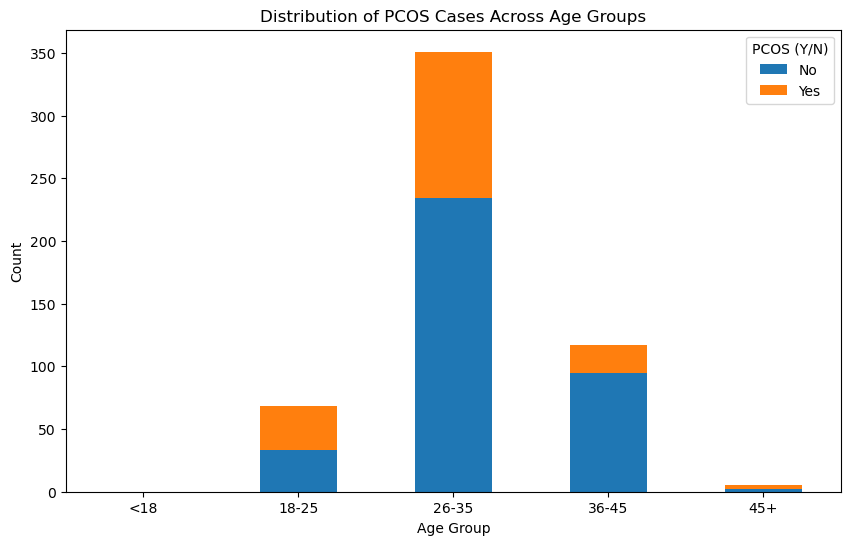

In [28]:
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13488\1216591656.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcos_patients['Age Group'] = pd.cut(pcos_patients[' Age (yrs)'], bins=age_groups, labels=age_labels)


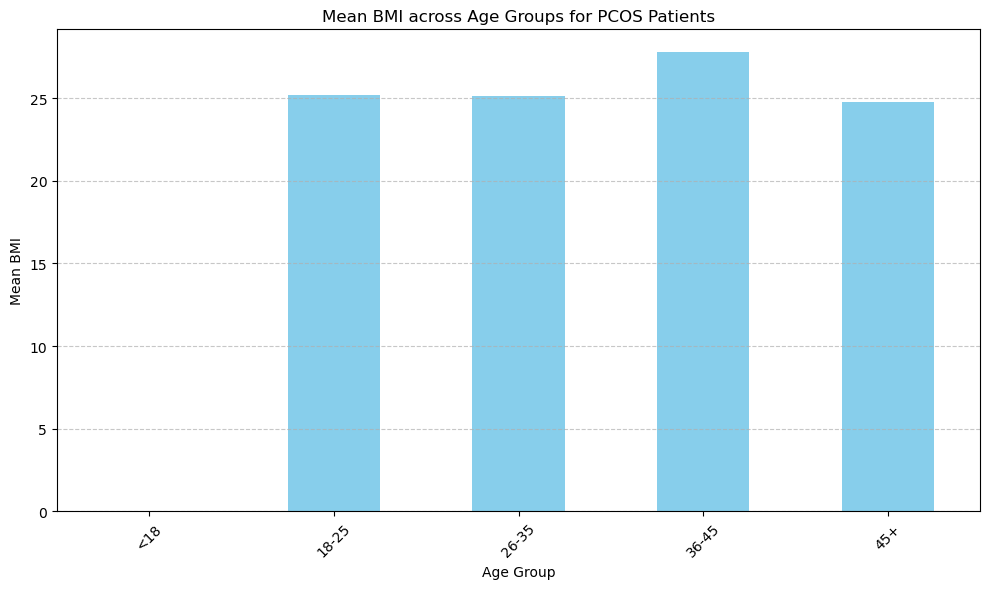

In [29]:
# Define age group bins and labels
age_groups = [0, 18, 25, 35, 45, float('inf')]
age_labels = ['<18', '18-25', '26-35', '36-45', '45+']

# Filter PCOS patients with PCOS_I = Yes
pcos_patients = PCOS_dt[PCOS_dt['PCOS (Y/N)'] == 1]

# Create a new column for Age Group
pcos_patients['Age Group'] = pd.cut(pcos_patients[' Age (yrs)'], bins=age_groups, labels=age_labels)

# Plot histogram of age against BMI using a bar plot
plt.figure(figsize=(10, 6))
pcos_patients.groupby('Age Group')['BMI'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Mean BMI')
plt.title('Mean BMI across Age Groups for PCOS Patients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### OBSERVATION : This analysis reveals that individuals affected by Polycystic Ovary Syndrome (PCOS) exhibit notable fluctuations in Body Mass Index (BMI), particularly evident from the age of 18 and beyond. The data indicates that BMI tends to escalate with age, with the highest BMI readings concentrated within the age bracket of 36 to 45 years. This observation underscores the significant impact of PCOS on BMI levels, highlighting the need for targeted interventions and management strategies, particularly for individuals in the latter stages of reproductive age. Such insights are pivotal for devising tailored approaches to address the complex interplay between PCOS and BMI fluctuations, thus facilitating more effective healthcare interventions and support for affected individuals.

In [30]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Age_Group' column
PCOS_dt['Age Group'] = label_encoder.fit_transform(PCOS_dt['Age Group'])

# Check the unique encoded values
print(PCOS_dt['Age Group'].unique())

[1 2 0 3]


In [31]:
# Assuming 'PCOS' column contains 1 for 'yes' and 0 for 'no'
PCOS_data = PCOS_dt[PCOS_dt['PCOS (Y/N)'] == 1].copy()

# Display the first few rows of the filtered DataFrame
print(PCOS_data.head())

    Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
2        3                 3           1          33         68.8   
12      13                13           1          25         74.0   
19      20                20           1          30         85.0   
24      25                25           1          34         63.0   
26      27                27           1          30         76.0   

    Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
2         165.0  25.3           11                72                18  ...   
12        152.0  32.0           17                72                18  ...   
19        165.0  31.2           16                72                18  ...   
24        158.0  25.2           11                72                20  ...   
26        160.0  29.7           15                75                18  ...   

    BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
2                     80                13    

In [32]:
# Drop rows with NaN values
PCOS_data.dropna(inplace=True)

# Display the first few rows of the filtered DataFrame
print(PCOS_data.head())

    Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
2        3                 3           1          33         68.8   
12      13                13           1          25         74.0   
19      20                20           1          30         85.0   
24      25                25           1          34         63.0   
26      27                27           1          30         76.0   

    Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
2         165.0  25.3           11                72                18  ...   
12        152.0  32.0           17                72                18  ...   
19        165.0  31.2           16                72                18  ...   
24        158.0  25.2           11                72                20  ...   
26        160.0  29.7           15                75                18  ...   

    BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
2                     80                13    

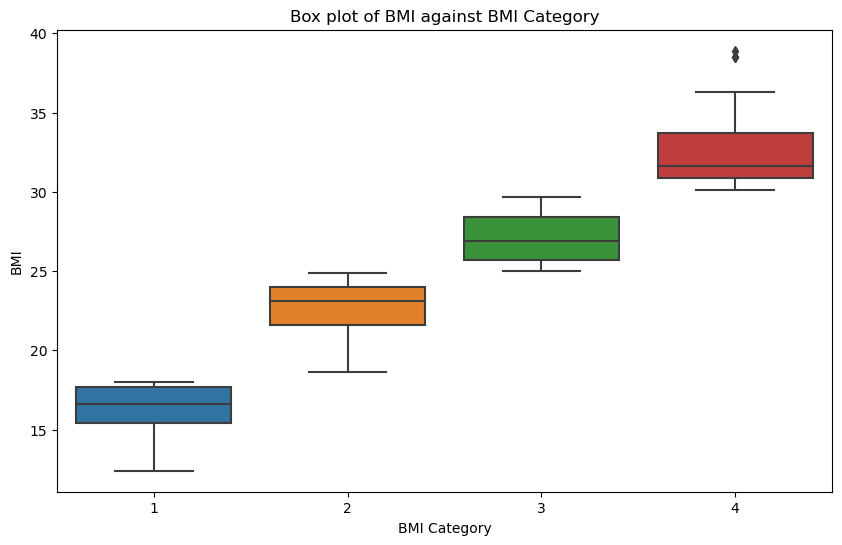

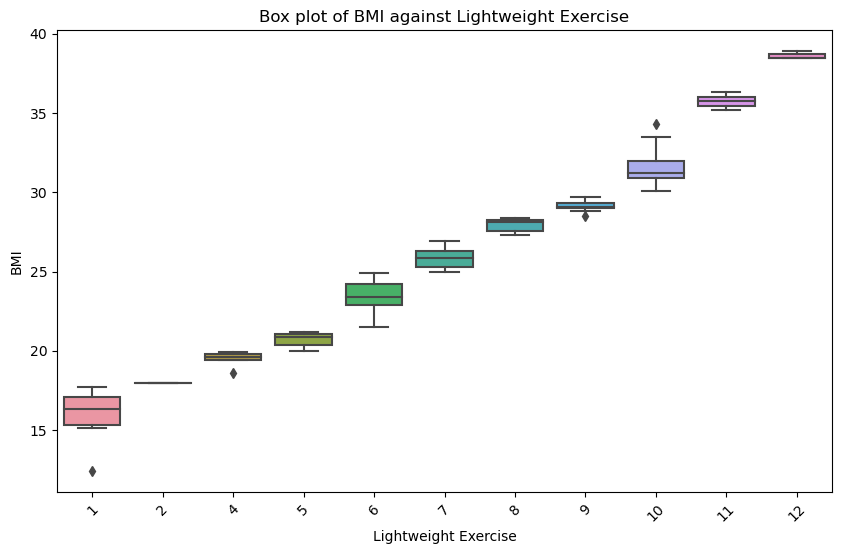

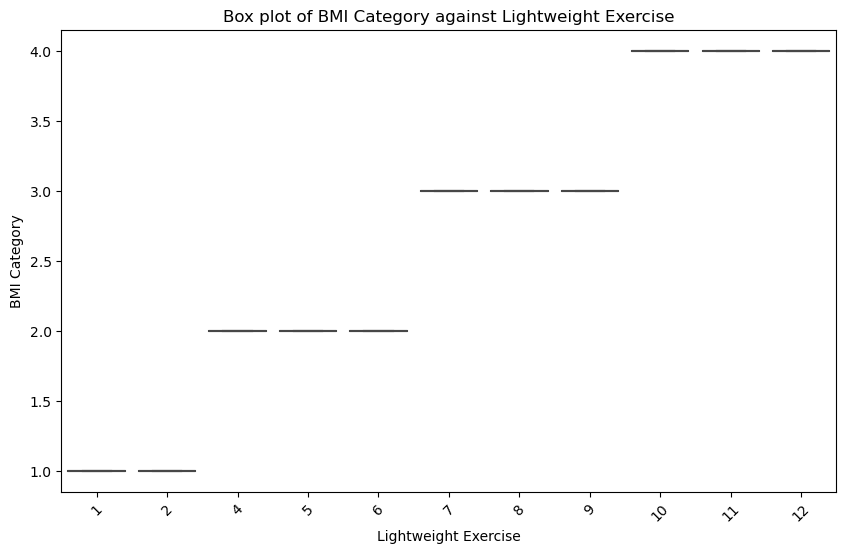

In [33]:
# Box plot for BMI against BMI_category
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_category', y='BMI', data=PCOS_data)
plt.title('Box plot of BMI against BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('BMI')
plt.show()

# Box plot for BMI against Lightweight_exercise
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lightweight_exercise', y='BMI', data=PCOS_data)
plt.title('Box plot of BMI against Lightweight Exercise')
plt.xlabel('Lightweight Exercise')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

# Box plot for BMI_category against Lightweight_exercise
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lightweight_exercise', y='BMI_category', data=PCOS_data)
plt.title('Box plot of BMI Category against Lightweight Exercise')
plt.xlabel('Lightweight Exercise')
plt.ylabel('BMI Category')
plt.xticks(rotation=45)
plt.show()

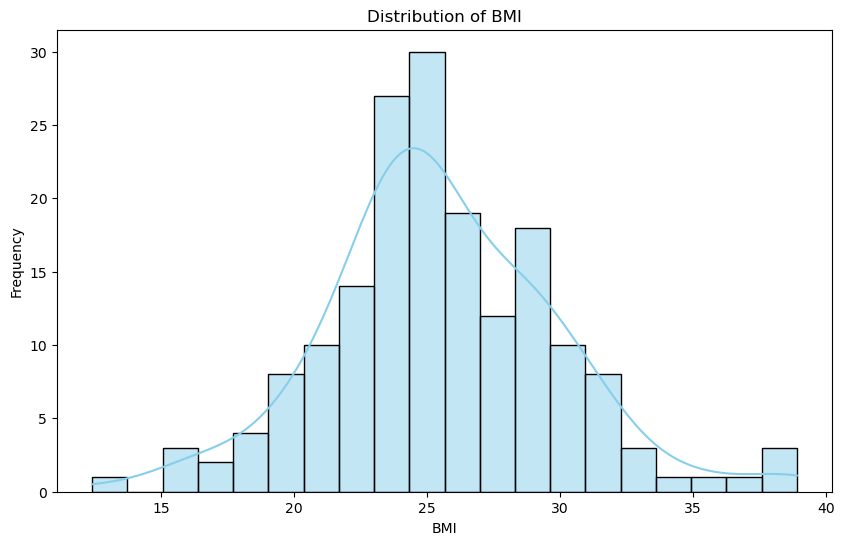

In [34]:
# Distribution plot of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data=PCOS_data, x='BMI', kde=True, color='skyblue', bins=20)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

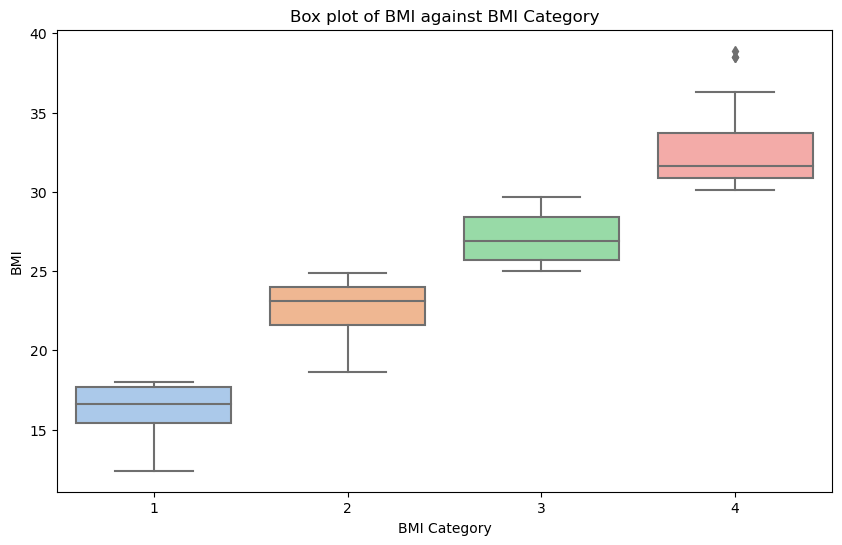

In [35]:
# Box plot of BMI against BMI category
plt.figure(figsize=(10, 6))
sns.boxplot(data=PCOS_data, x='BMI_category', y='BMI', palette='pastel')
plt.title('Box plot of BMI against BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('BMI')
plt.show()

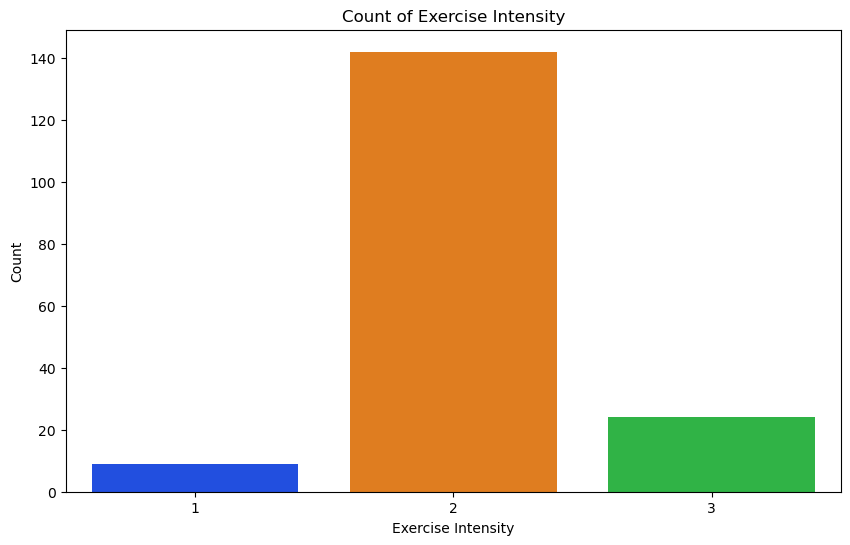

In [36]:
# Count plot of exercise intensity
plt.figure(figsize=(10, 6))
sns.countplot(data=PCOS_data, x='exercise_intensity', palette='bright')
plt.title('Count of Exercise Intensity')
plt.xlabel('Exercise Intensity')
plt.ylabel('Count')
plt.show()

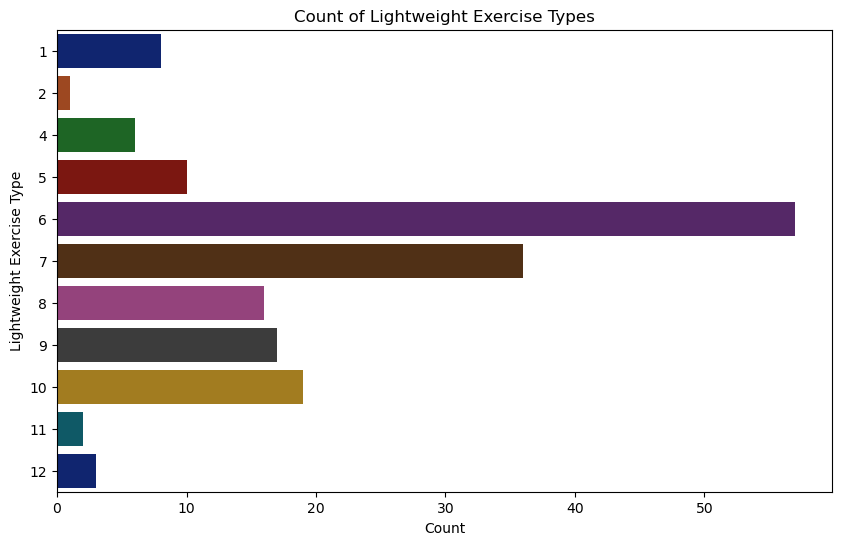

In [37]:
# Count plot of exercise types
plt.figure(figsize=(10, 6))
sns.countplot(data=PCOS_data, y='Lightweight_exercise', palette='dark')
plt.title('Count of Lightweight Exercise Types')
plt.xlabel('Count')
plt.ylabel('Lightweight Exercise Type')
plt.show()

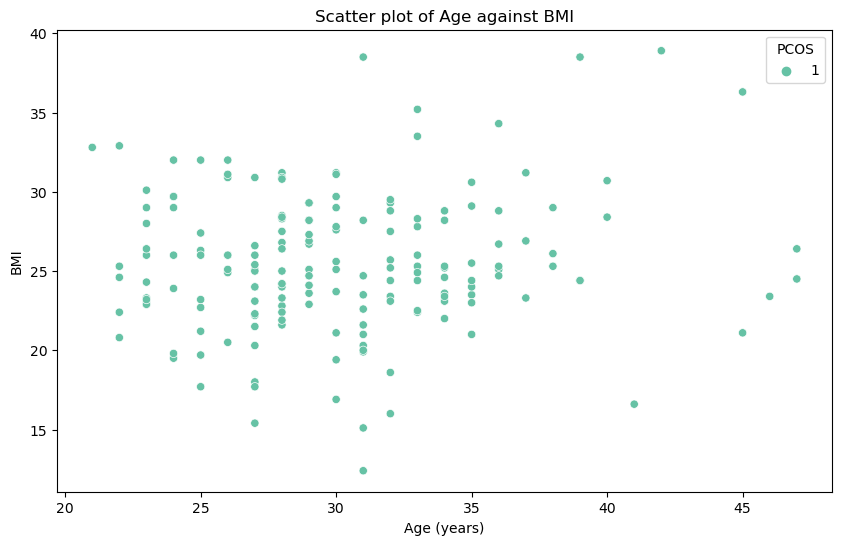

In [38]:
# Scatter plot of Age against BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=PCOS_data, x=' Age (yrs)', y='BMI', hue='PCOS (Y/N)', palette='Set2')
plt.title('Scatter plot of Age against BMI')
plt.xlabel('Age (years)')
plt.ylabel('BMI')
plt.legend(title='PCOS', loc='best')
plt.show()

In [39]:
# Sort the Series in descending order
top_10_features = correlation_with_target.head(11).sort_values(ascending=False).reset_index()
top_10_features.columns = ['Variable', 'Correlation']
print(top_10_features)

                Variable  Correlation
0       Weight gain(Y/N)     1.000000
1           BMI_category     0.459826
2                    BMI     0.455304
3             PCOS (Y/N)     0.441047
4   Lightweight_exercise     0.419428
5            Weight (Kg)     0.419333
6        Fast food (Y/N)     0.374313
7   Skin darkening (Y/N)     0.350681
8            Waist(inch)     0.330524
9              Hip(inch)     0.314125
10      hair growth(Y/N)     0.301084


In [40]:
# Manually select features from the dataset
selectd_features = ['Weight gain(Y/N)', 'BMI_category', 'BMI', 'Lightweight_exercise',  
                     'Weight (Kg)',  'Cycle(R/I)', 'Waist(inch)', 'Hip(inch)', 
                     'hair growth(Y/N)', ' Age (yrs)', 'Height(Cm) ', 'exercise_intensity']

# Create a new DataFrame containing only the selected features
PCOS_selectd_features = PCOS_data[selectd_features].copy()

# Display the first few rows of the new DataFrame
print(PCOS_selectd_features.head())

    Weight gain(Y/N)  BMI_category   BMI  Lightweight_exercise  Weight (Kg)  \
2                  0             3  25.3                     7         68.8   
12                 1             4  32.0                    10         74.0   
19                 0             4  31.2                    10         85.0   
24                 0             3  25.2                     7         63.0   
26                 1             3  29.7                     9         76.0   

    Cycle(R/I)  Waist(inch)  Hip(inch)  hair growth(Y/N)   Age (yrs)  \
2            2           36         40                 0          33   
12           4           40         45                 1          25   
19           4           42         44                 1          30   
24           2           32         38                 1          34   
26           4           38         45                 1          30   

    Height(Cm)   exercise_intensity  
2         165.0                   2  
12        152.0 

In [41]:
PCOS_selectd_features.isnull().sum()

Weight gain(Y/N)        0
BMI_category            0
BMI                     0
Lightweight_exercise    0
Weight (Kg)             0
Cycle(R/I)              0
Waist(inch)             0
Hip(inch)               0
hair growth(Y/N)        0
 Age (yrs)              0
Height(Cm)              0
exercise_intensity      0
dtype: int64

In [42]:
# Save the updated DataFrame to a new CSV file
PCOS_selectd_features.to_csv('cleand_features.csv', index=False)

# Display the first few rows of the new DataFrame
print(PCOS_selectd_features.head())

    Weight gain(Y/N)  BMI_category   BMI  Lightweight_exercise  Weight (Kg)  \
2                  0             3  25.3                     7         68.8   
12                 1             4  32.0                    10         74.0   
19                 0             4  31.2                    10         85.0   
24                 0             3  25.2                     7         63.0   
26                 1             3  29.7                     9         76.0   

    Cycle(R/I)  Waist(inch)  Hip(inch)  hair growth(Y/N)   Age (yrs)  \
2            2           36         40                 0          33   
12           4           40         45                 1          25   
19           4           42         44                 1          30   
24           2           32         38                 1          34   
26           4           38         45                 1          30   

    Height(Cm)   exercise_intensity  
2         165.0                   2  
12        152.0 

In [43]:
PCOS_nw_data = pd.read_csv(r'C:\Users\User\cleand_features.csv', encoding='ISO-8859-1')

PCOS_nw_data.head()

,Weight gain(Y/N),BMI_category,BMI,Lightweight_exercise,Weight (Kg),Cycle(R/I),Waist(inch),Hip(inch),hair growth(Y/N),Age (yrs),Height(Cm),exercise_intensity
0,0,3,25.3,7,68.8,2,36,40,0,33,165.0,2
1,1,4,32.0,10,74.0,4,40,45,1,25,152.0,3
2,0,4,31.2,10,85.0,4,42,44,1,30,165.0,3
3,0,3,25.2,7,63.0,2,32,38,1,34,158.0,2
4,1,3,29.7,9,76.0,4,38,45,1,30,160.0,2


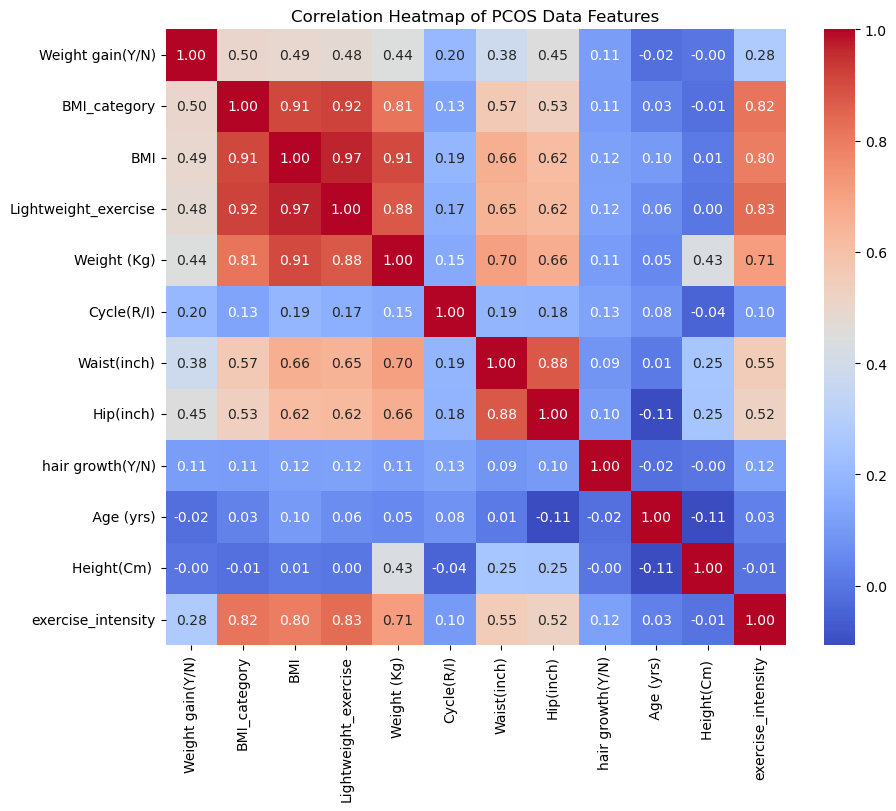

In [44]:
# Calculate the correlation matrix
correlation_matrix = PCOS_nw_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of PCOS Data Features')
plt.show()

In [45]:
# Manually select features from the dataset
selected_features = ['Weight (Kg)' , 'Height(Cm) ', ' Age (yrs)', 'Cycle(R/I)', 
                     'hair growth(Y/N)' , 'BMI', 'Weight gain(Y/N)']

# Create a new DataFrame containing only the selected features
PCOS_selected_features = PCOS_data[selected_features].copy()

# Display the first few rows of the new DataFrame
print(PCOS_selected_features.head())

    Weight (Kg)  Height(Cm)    Age (yrs)  Cycle(R/I)  hair growth(Y/N)   BMI  \
2          68.8        165.0          33           2                 0  25.3   
12         74.0        152.0          25           4                 1  32.0   
19         85.0        165.0          30           4                 1  31.2   
24         63.0        158.0          34           2                 1  25.2   
26         76.0        160.0          30           4                 1  29.7   

    Weight gain(Y/N)  
2                  0  
12                 1  
19                 0  
24                 0  
26                 1  


In [46]:
# Save the updated DataFrame to a new CSV file
PCOS_selected_features.to_csv('cleaned_features.csv', index=False)

# Display the first few rows of the new DataFrame
print(PCOS_selected_features.head())

    Weight (Kg)  Height(Cm)    Age (yrs)  Cycle(R/I)  hair growth(Y/N)   BMI  \
2          68.8        165.0          33           2                 0  25.3   
12         74.0        152.0          25           4                 1  32.0   
19         85.0        165.0          30           4                 1  31.2   
24         63.0        158.0          34           2                 1  25.2   
26         76.0        160.0          30           4                 1  29.7   

    Weight gain(Y/N)  
2                  0  
12                 1  
19                 0  
24                 0  
26                 1  


In [47]:
PCOS_new_data = pd.read_csv(r'C:\Users\User\cleaned_features.csv', encoding='ISO-8859-1')

PCOS_new_data.head()

,Weight (Kg),Height(Cm),Age (yrs),Cycle(R/I),hair growth(Y/N),BMI,Weight gain(Y/N)
0,68.8,165.0,33,2,0,25.3,0
1,74.0,152.0,25,4,1,32.0,1
2,85.0,165.0,30,4,1,31.2,0
3,63.0,158.0,34,2,1,25.2,0
4,76.0,160.0,30,4,1,29.7,1


In [48]:
PCOS_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Weight (Kg)       175 non-null    float64
 1   Height(Cm)        175 non-null    float64
 2    Age (yrs)        175 non-null    int64  
 3   Cycle(R/I)        175 non-null    int64  
 4   hair growth(Y/N)  175 non-null    int64  
 5   BMI               175 non-null    float64
 6   Weight gain(Y/N)  175 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 9.7 KB


In [49]:
PCOS_new_data['Weight gain(Y/N)'].value_counts()

Weight gain(Y/N)
1    120
0     55
Name: count, dtype: int64

In [50]:
# Separate features (X) and target variable (y)
X = PCOS_new_data.drop('Weight gain(Y/N)', axis=1)
y = PCOS_new_data['Weight gain(Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (140, 6) (140,)
Test set shape: (35, 6) (35,)


In [51]:
# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
X_train

array([[-2.28649081e-01,  1.66754556e-01, -5.50607931e-01,
        -9.96547314e-01,  9.04534034e-01, -3.31692116e-01],
       [ 7.77191338e-01, -1.09728994e+00, -7.35464310e-01,
         9.82411891e-01, -1.10554160e+00,  1.55694627e+00],
       [-1.14228746e+00,  3.24760119e-01,  3.96120813e-03,
         9.82411891e-01,  9.04534034e-01, -1.41765919e+00],
       [-8.99209360e-01, -1.57130663e+00, -1.80895171e-01,
         9.82411891e-01, -1.10554160e+00, -3.08084137e-01],
       [-2.28649081e-01, -7.81278819e-01,  5.58530347e-01,
        -9.96547314e-01, -1.10554160e+00,  1.40467480e-01],
       [ 1.61539169e+00,  1.66754556e-01, -1.65974621e+00,
         9.82411891e-01,  9.04534034e-01,  1.74581011e+00],
       [ 1.90451094e-01,  1.66754556e-01, -5.50607931e-01,
        -9.96547314e-01,  9.04534034e-01,  1.40467480e-01],
       [-1.06684943e+00,  1.66754556e-01,  1.88817588e-01,
        -9.96547314e-01, -1.10554160e+00, -1.27601131e+00],
       [ 1.86685179e+00,  1.27279349e+00,  3.961

In [53]:
y_train

118    0
143    1
164    0
38     1
135    1
      ..
71     1
106    1
14     1
92     0
102    1
Name: Weight gain(Y/N), Length: 140, dtype: int64

In [54]:
# Step 1: Data Preprocessing (if necessary)
# Ensure y_train and y_test are of integer type
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

In [55]:
# Choose suitable machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Perceptron': Perceptron(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

In [56]:
# Train the selected models on the training data
trained_models = {}
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    y_pred = model.predict(X_test)
    
    # Convert labels to binary (0 and 1)
    y_test_binary = (y_test > 0).astype(int)
    predictions_binary = (y_pred > 0).astype(int)
    
    accuracy = accuracy_score(y_test_binary, predictions_binary)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_test_binary, predictions_binary)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_binary, predictions_binary)}\n")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"Best Model: {best_model} with Accuracy: {best_accuracy}")

Model: Logistic Regression
Accuracy: 0.7428571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.73      0.96      0.83        23

    accuracy                           0.74        35
   macro avg       0.77      0.64      0.65        35
weighted avg       0.76      0.74      0.71        35

Confusion Matrix:
[[ 4  8]
 [ 1 22]]

Model: Linear Regression
Accuracy: 0.6571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.66      1.00      0.79        23

    accuracy                           0.66        35
   macro avg       0.33      0.50      0.40        35
weighted avg       0.43      0.66      0.52        35

Confusion Matrix:
[[ 0 12]
 [ 0 23]]



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Random Forest
Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.79      0.96      0.86        23

    accuracy                           0.80        35
   macro avg       0.82      0.73      0.75        35
weighted avg       0.81      0.80      0.78        35

Confusion Matrix:
[[ 6  6]
 [ 1 22]]

Model: SVM
Accuracy: 0.7428571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.73      0.96      0.83        23

    accuracy                           0.74        35
   macro avg       0.77      0.64      0.65        35
weighted avg       0.76      0.74      0.71        35

Confusion Matrix:
[[ 4  8]
 [ 1 22]]

Model: KNN
Accuracy: 0.7714285714285715
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.

In [57]:
# Train the Random Forest classifier on the training data
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

# Make predictions on the test data
y_predrf = forest_clf.predict(X_test)

# Convert labels to binary (0 and 1)
y_test_binary = (y_test > 0).astype(int)
predictions_binaryrf = (y_predrf > 0).astype(int)

# Compute accuracy and other evaluation metrics
accuracyrf = accuracy_score(y_test_binary, predictions_binaryrf)
print("Accuracy:", accuracyrf)
classification_reportrf = (classification_report(y_test_binary, predictions_binaryrf))
print("Classification Report:", classification_reportrf)
confusion_matrixrf = (confusion_matrix(y_test_binary, predictions_binaryrf))
print("Confusion Matrix:", confusion_matrixrf)

Accuracy: 0.8285714285714286
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.81      0.96      0.88        23

    accuracy                           0.83        35
   macro avg       0.84      0.77      0.79        35
weighted avg       0.84      0.83      0.82        35

Confusion Matrix: [[ 7  5]
 [ 1 22]]


In [58]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pickle
# Save your trained model using pickle
model_file = 'exercise_model.sav'

In [60]:
scaledexer_name = 'scaledexer.pkl'

In [61]:
pickle.dump(forest_clf, open(model_file, 'wb'))
pickle.dump(sc, open(scaledexer_name, 'wb'))

In [62]:
# Load the saved model using pickle
loadd_model = pickle.load(open(model_file, 'rb'))

In [63]:
# Load the saved model using pickle
scaled_model = pickle.load(open(scaledexer_name, 'rb'))